# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources`
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

from sys import exit
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import linear_model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/yoni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


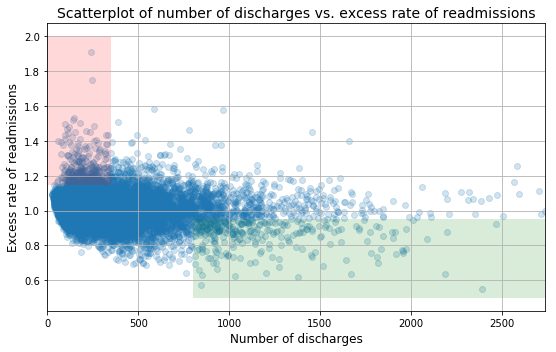

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,4000], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

Their analysis is based on outliers which makes their recommendations unjustifiable. It is not clear fromthe scatter plot that there is a relationship between number of discharges and excess rate of readmissions. The most of the datapoints are single clustered making it difficult to seen indiviual data points. Without the outliers, it is not clear that these attributes are negatively correlated. 

It is also worth noting that there was no attempt to remove null "Expected Readmission Rate" which is poor data wrangling practice.

Another thing of note is that while they define facilities as small if below 300 in their recommendations, their analysis examined facilities below 100. There does not seem to be an attempt to be consistant throught their analysis.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

 <b>1. Setup an apprereopriate hypothesis test.</b> <br>
Null hypothesis: There is a no correlation betwen number of discharges and the excess rate of readmissions. <br>
Alternative hypothesis:  There is a correlation betwen number of discharges and the excess rate of readmissions.
<br>
<b>2. Compute and report the observed significance value (or p-value).</b>
<br>
The p-value is approximately 0.
<br>
<b>3. Report statistical significance for $\alpha$ = .01.</b>
<br>
Since the p-value of the Pearson correlation is 0, it excess the 99% confidence. This makes the relationship statistically significant. Though the Pearson correlation is so small, I find the relationship suspect. 

<b>4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?</b>
<br>
 Statistical significance indicates that likeliness of the rejection the null hypothsis occurring from noise in the data rather a real effect. In other words, the higher the statitical significance (a lower p-value), the more confidence that an observed effect is real. This is indicate whehter the effect is large. Often with large sample size, small effects an become statistically significance.
 
While the coorelation between expected readmission rate and number of discharges is statistically significance (as indicated by the p-value), the correlation is weak (indicated by the Pearson correlation). Making any recommendations based on this data unreasonable. 
<br>

__5. Look at the scatterplot above.__
  - __What are the advantages and disadvantages of using this plot to convey information?__
  - __Construct another plot that conveys the same information in a more direct manner.__
Scatterplot helps visualize correlated data particularly if there is Pearson correlation is large. If the correlation is weak, the data is spread out, or the data is clumped together making the individual points hard to see, the relationship may not be obvious. Adding a line plot from a linear regression helps to highlight the report.

In [5]:
#clean data and remove data that cannot be analyzed.

#remove columns without Discharged data
hospital_clean = hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']
hospital_clean['Number of Discharges']=hospital_clean['Number of Discharges'].astype(int)

#remove columns with no Expected Readmission Rate
hospital_clean = hospital_clean[hospital_clean['Expected Readmission Rate'].notnull()]

#drop now empty footnote column
hospital_clean.drop(columns='Footnote',inplace=True)

#order by Number of discharged
hospital_clean = hospital_clean.sort_values('Number of Discharges')

/home/yoni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# Correlate Excess Readmission Ratio with  Number of Discharges

In [6]:
# recreate the example plot
lm = linear_model.LinearRegression()
x = hospital_clean[['Number of Discharges']]
y = hospital_clean['Excess Readmission Ratio']
lm.fit(x,y)
intercept = float(lm.intercept_)
slope = float(lm.coef_)


#p test
x_array = np.array(hospital_clean['Number of Discharges'])
y_array = np.array(hospital_clean['Excess Readmission Ratio'])
pearson_coor = np.corrcoef(x_array,y_array)[0,1]
p_replicates = np.empty(10000)
for i in range(10000):
    discharged_permuted = np.random.permutation(x_array)  
    p_replicates[i] = corr_mat = np.corrcoef(discharged_permuted,y_array)[0,1]
pvalue = np.sum(abs(p_replicates)>abs(pearson_coor))/len(p_replicates)
print('slope,y-intercept={:.2e}, {:.2f}'.format(slope,intercept))
print('r,p-value= {:.4f}, {:.2e}'.format(pearson_coor,pvalue))

slope,y-intercept=-2.90e-05, 1.02
r,p-value= -0.0974, 0.00e+00


/home/yoni/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


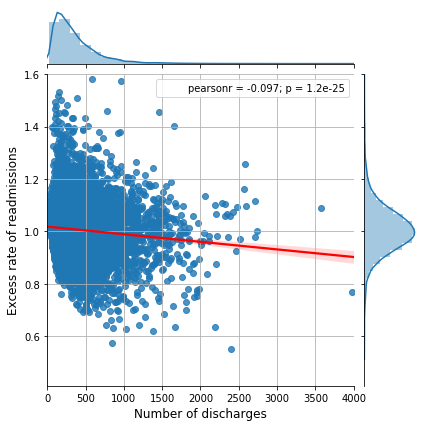

In [8]:
#jointplot plot
sns.jointplot(data=hospital_clean,x='Number of Discharges',y='Excess Readmission Ratio',
             kind='reg',joint_kws={'line_kws':{'color':'red'}}).annotate(stats.pearsonr)

plt.xlim(0,4000)
plt.ylim([0.41, 1.6])
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.grid(True)
plt.show()